In [13]:
import pandas as pd
from sklearn import ensemble
import matplotlib.pyplot as plt
import numpy as np
import math as math

def rmse(A,B):
    return np.sqrt(((A - B)**2).sum()/len(A))

def ARE(true,model):
    return (abs(true - model)/true*100).sum()/len(true)

def stz(Data):
    return (Data - Data.mean())/Data.std()

def norm(Data, norm_min=-0.9, norm_max=0.9):
    return (Data - Data.min())/(Data.max() - Data.min())*(norm_max - norm_min) + norm_min

Data = pd.read_csv(r'D:\Desktop\190925\bubble\wall_SNU_include.csv')
stz_Data = stz(Data)
norm_Data = norm(Data)

All_Data = pd.DataFrame()
All_Data[Data.columns[0:3]] = norm_Data[Data.columns[0:3]]
All_Data[Data.columns[3]] = stz_Data[Data.columns[3]]
All_Data[Data.columns[4]] = norm_Data[Data.columns[4]]
All_Data[Data.columns[5]] = stz_Data[Data.columns[5]]

All_Data = All_Data.sample(frac=1)

from sklearn.model_selection import KFold
kfold = KFold(n_splits=5)

rmse_list = []
are_list = []

## HS parameters #####
# min samples leaf : 1
# max depth : None
######################

## RF hyper parameter change #####
#  min_samples_leaf
msl = [2,3,4,5]
#  max_depth
md = [None,1,2,3]
#################################

for p in msl:
    for q in md:
        
        for i,(train, test) in enumerate(kfold.split(All_Data)):
            train_Data = All_Data.iloc[train]
            test_Data = All_Data.iloc[test]
            train_target = train_Data.pop(Data.columns[-1])
            test_target = test_Data.pop(Data.columns[-1])


            n_tree = range(4000,5000,10)

            for num_tree in n_tree:

                RFmodel = ensemble.RandomForestRegressor(n_estimators=num_tree, min_samples_split=p, min_samples_leaf=1, bootstrap=False, oob_score=False, 
                                                                        max_depth=q, max_features='auto', random_state=None, n_jobs=2)
                RFmodel.fit(train_Data,train_target)

                aa = pd.DataFrame()
                aa['model'] = RFmodel.predict(test_Data)
                aa['y_data'] = test_target.reset_index(drop=True)

                destz_aa = aa*Data.std()[-1] + Data.mean()[-1]

                rmse_value = rmse(destz_aa['model'],destz_aa['y_data'])
                ARE_value = ARE(destz_aa['model'],destz_aa['y_data'])

                rmse_list.append(rmse_value)
                are_list.append(ARE_value)

        print('mean samples leaf {} max depth {} avg rmse : '.format(p,q),sum(rmse_list)/len(rmse_list))
        print('mean samples leaf {} max depth {} avg are : '.format(p,q),sum(are_list)/len(are_list))

mean samples leaf 2 max depth None avg rmse :  0.043134076824487444
mean samples leaf 2 max depth None avg are :  6.057048723412962
mean samples leaf 2 max depth 1 avg rmse :  0.04592381727888255
mean samples leaf 2 max depth 1 avg are :  11.460245540538292
mean samples leaf 2 max depth 2 avg rmse :  0.044439352701341944
mean samples leaf 2 max depth 2 avg are :  11.4630265217096
mean samples leaf 2 max depth 3 avg rmse :  0.04346052229165546
mean samples leaf 2 max depth 3 avg are :  11.289253083545182
mean samples leaf 3 max depth None avg rmse :  0.04319718370794755
mean samples leaf 3 max depth None avg are :  10.254120036265878
mean samples leaf 3 max depth 1 avg rmse :  0.044116579378836854
mean samples leaf 3 max depth 1 avg are :  11.35567375649891
mean samples leaf 3 max depth 2 avg rmse :  0.04373876440761681
mean samples leaf 3 max depth 2 avg are :  11.371823796443373
mean samples leaf 3 max depth 3 avg rmse :  0.0432794281551915
mean samples leaf 3 max depth 3 avg are :  1

In [32]:
import pandas as pd
import sys
mod = sys.modules[__name__]
from sklearn import ensemble
import numpy as np

Data = pd.read_csv(r'D:\Desktop\SynologyDrive\하강우\bubble\data\bubble.csv')
R_csv = pd.read_csv(r'D:\Desktop\SynologyDrive\하강우\bubble\data\R.csv')

num_Fold = 3

mean = Data.mean()[-1]
std = Data.std()[-1]

def stz(Data):
    return (Data - Data.mean())/Data.std()

def norm(Data, min_norm=-0.9, max_norm=0.9):
    return (Data - Data.min())/(Data.max() - Data.min())*(max_norm - min_norm) + min_norm

stz_Data = stz(Data)
norm_Data = norm(Data)

All_Data = pd.DataFrame()
All_Data[Data.columns[0:3]] = norm_Data[Data.columns[0:3]]
All_Data[Data.columns[3]] = stz_Data[Data.columns[3]]
All_Data[Data.columns[4]] = norm_Data[Data.columns[4]]
All_Data[Data.columns[5]] = stz_Data[Data.columns[5]]
All_Data['R'] = R_csv[['R']].iloc[:len(Data)]
All_Data['index'] = [i for i in range(len(Data))]

shuffle_Data = All_Data.sample(frac=1).reset_index(drop=True)

for i in range(num_Fold):

    if i+1 == num_Fold:

        test_X = shuffle_Data[shuffle_Data.columns[:-3]].iloc[i*((len(Data)//num_Fold)+1):].reset_index(drop=True)
        test_Y = shuffle_Data[shuffle_Data.columns[-3:-2]].iloc[i*((len(Data)//num_Fold)+1):].reset_index(drop=True)
        test_R = shuffle_Data[shuffle_Data.columns[-2:-1]].iloc[i*((len(Data)//num_Fold)+1):].reset_index(drop=True)
        test_I = shuffle_Data[shuffle_Data.columns[-1:]].iloc[i*((len(Data)//num_Fold)+1):].reset_index(drop=True)

        train_X = shuffle_Data[shuffle_Data.columns[:-3]].drop(test_X.index).reset_index(drop=True)
        train_Y = shuffle_Data[shuffle_Data.columns[-3:-2]].drop(test_X.index).reset_index(drop=True)
        train_R = shuffle_Data[shuffle_Data.columns[-2:-1]].drop(test_X.index).reset_index(drop=True)
        train_I = shuffle_Data[shuffle_Data.columns[-1:]].drop(test_X.index).reset_index(drop=True)

    else:

        test_X = shuffle_Data[shuffle_Data.columns[:-3]].iloc[i*((len(Data)//num_Fold)+1):(i+1)*((len(Data)//num_Fold)+1)].reset_index(drop=True)
        test_Y = shuffle_Data[shuffle_Data.columns[-3:-2]].iloc[i*((len(Data)//num_Fold)+1):(i+1)*((len(Data)//num_Fold)+1)].reset_index(drop=True)
        test_R = shuffle_Data[shuffle_Data.columns[-2:-1]].iloc[i*((len(Data)//num_Fold)+1):(i+1)*((len(Data)//num_Fold)+1)].reset_index(drop=True)
        test_I = shuffle_Data[shuffle_Data.columns[-1:]].iloc[i*((len(Data)//num_Fold)+1):(i+1)*((len(Data)//num_Fold)+1)].reset_index(drop=True)

        train_X = shuffle_Data[shuffle_Data.columns[:-3]].drop(test_X.index).reset_index(drop=True)
        train_Y = shuffle_Data[shuffle_Data.columns[-3:-2]].drop(test_X.index).reset_index(drop=True)
        train_R = shuffle_Data[shuffle_Data.columns[-2:-1]].drop(test_X.index).reset_index(drop=True)
        train_I = shuffle_Data[shuffle_Data.columns[-1:]].drop(test_X.index).reset_index(drop=True)

    RFmodel = ensemble.RandomForestRegressor(n_estimators=2000, min_samples_split=2, min_samples_leaf=1, bootstrap=False, oob_score=False, 
                                                                        max_depth=None, max_features='auto', random_state=None, n_jobs=2)
    RFmodel.fit(test_X, test_Y)
    setattr(mod,'inter_Fold_Data_{}'.format(i+1), pd.DataFrame())
    setattr(mod,'extra_Fold_Data_{}'.format(i+1), pd.DataFrame())
    
    getattr(mod,'inter_Fold_Data_{}'.format(i+1))['model'] = RFmodel.predict(train_X).flatten()
    getattr(mod,'inter_Fold_Data_{}'.format(i+1))['y_data'] = train_Y
    
    
    getattr(mod,'extra_Fold_Data_{}'.format(i+1))['model'] = RFmodel.predict(test_X).flatten()
    getattr(mod,'extra_Fold_Data_{}'.format(i+1))['y_data'] = test_Y
    
    setattr(mod,'inter_Fold_Data_{}'.format(i+1), getattr(mod,'inter_Fold_Data_{}'.format(i+1))*std + mean)
    getattr(mod,'inter_Fold_Data_{}'.format(i+1))['index'] = train_I
    
    setattr(mod,'extra_Fold_Data_{}'.format(i+1), getattr(mod,'extra_Fold_Data_{}'.format(i+1))*std + mean)
    getattr(mod,'extra_Fold_Data_{}'.format(i+1))['index'] = test_I
    
    getattr(mod,'inter_Fold_Data_{}'.format(i+1))['model'] = getattr(mod,'inter_Fold_Data_{}'.format(i+1))['model']*train_R['R']
    getattr(mod,'inter_Fold_Data_{}'.format(i+1))['y_data'] = getattr(mod,'inter_Fold_Data_{}'.format(i+1))['y_data']*train_R['R']
    getattr(mod,'inter_Fold_Data_{}'.format(i+1)).to_csv(r'D:\Desktop\SynologyDrive\하강우\bubble\K_Fold_RF\3_Fold_inter_Fold_{}.csv'.format(i+1),header=True,index=False)
    
    getattr(mod,'extra_Fold_Data_{}'.format(i+1))['model'] = getattr(mod,'extra_Fold_Data_{}'.format(i+1))['model']*test_R['R']
    getattr(mod,'extra_Fold_Data_{}'.format(i+1))['y_data'] = getattr(mod,'extra_Fold_Data_{}'.format(i+1))['y_data']*test_R['R']
    getattr(mod,'extra_Fold_Data_{}'.format(i+1)).to_csv(r'D:\Desktop\SynologyDrive\하강우\bubble\K_Fold_RF\3_Fold_extra_Fold_{}.csv'.format(i+1),header=True,index=False)

c:\users\user\anaconda\envs\tensorflow4\lib\site-packages\ipykernel_launcher.py:62: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
c:\users\user\anaconda\envs\tensorflow4\lib\site-packages\ipykernel_launcher.py:62: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
c:\users\user\anaconda\envs\tensorflow4\lib\site-packages\ipykernel_launcher.py:62: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


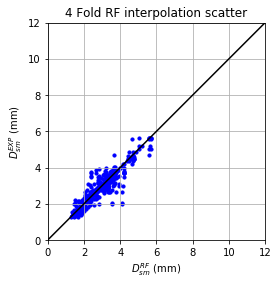

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.gca().set_aspect("equal")
for i in range(3):
    plt.scatter(getattr(mod,'inter_Fold_Data_{}'.format(i+1))['model'],getattr(mod,'inter_Fold_Data_{}'.format(i+1))['y_data'],s=10,color='b')
plt.plot([0,12],[0,12],color='k')    
plt.axis([0,12,0,12])
plt.grid(True)
plt.xlabel('$D_{sm}^{RF}$ (mm)')
plt.ylabel('$D_{sm}^{EXP}$ (mm)')
plt.title('4 Fold RF interpolation scatter')
plt.savefig(r'D:\Desktop\SynologyDrive\하강우\bubble\K_Fold_RF\3_Fold_inter_scatter.png',dpi=300)

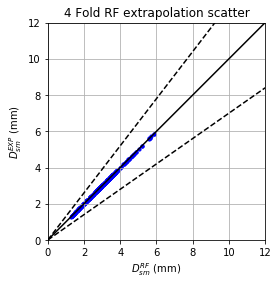

In [34]:
x = np.linspace(0,12)
y1 = x*1.3
y2 = x*0.7

plt.gca().set_aspect("equal")
for i in range(4):
    plt.scatter(getattr(mod,'extra_Fold_Data_{}'.format(i+1))['model'],getattr(mod,'extra_Fold_Data_{}'.format(i+1))['y_data'],s=10,color='b')
plt.plot([0,12],[0,12],color='k')    
plt.plot(x,y1,'--',color='k')
plt.plot(x,y2,'--',color='k')
plt.axis([0,12,0,12])
plt.grid(True)
plt.xlabel('$D_{sm}^{RF}$ (mm)')
plt.ylabel('$D_{sm}^{EXP}$ (mm)')
plt.title('4 Fold RF extrapolation scatter')
plt.savefig(r'D:\Desktop\SynologyDrive\하강우\bubble\K_Fold_RF\3_Fold_extra_scatter.png',dpi=300)

In [8]:
def RMSE(A,B):
    """
    A,B : Pandas Series type
    A : model
    B : true
    """
    return np.sqrt(((A - B)**2).mean())

def ARE(A,B):
    """
    A,B : Pandas Series type
    A : model
    B : true
    """
    return (abs((A - B)/B)*100).mean()

aa = []
bb = []

for i in range(4):
    aa.append(RMSE(getattr(mod,'inter_Fold_Data_{}'.format(i+1))['model'],getattr(mod,'inter_Fold_Data_{}'.format(i+1))['y_data']))
    bb.append(ARE(getattr(mod,'inter_Fold_Data_{}'.format(i+1))['model'],getattr(mod,'inter_Fold_Data_{}'.format(i+1))['y_data']))
    
print(sum(aa)/len(aa))
print(sum(bb)/len(bb))

0.002539689523971283
0.007262434309442805


In [21]:
aa = []
bb = []

for i in range(4):
    aa.append(RMSE(getattr(mod,'extra_Fold_Data_{}'.format(i+1))['model'],getattr(mod,'extra_Fold_Data_{}'.format(i+1))['y_data']))
    bb.append(ARE(getattr(mod,'extra_Fold_Data_{}'.format(i+1))['model'],getattr(mod,'extra_Fold_Data_{}'.format(i+1))['y_data']))
    
print(sum(aa)/len(aa))
print(sum(bb)/len(bb))

0.05439870963564105
1.3720040278826269


In [17]:
getattr(mod,'extra_Fold_Data_{}'.format(i+1))['model'] = RFmodel.predict(test_X).flatten()
getattr(mod,'extra_Fold_Data_{}'.format(i+1))['y_data'] = test_Y

extra_Fold_Data_4.head()

,model,y_data
0,0.550033,NaN
1,0.669290,NaN
2,0.671696,NaN
3,0.405370,NaN
4,-0.203128,NaN


In [501]:
for i in range(5):
    setattr(mod,'SGD_Data_{}'.format(i+1), pd.read_csv(r'D:\Desktop\SynologyDrive\하강우\bubble\wallcoresnu\ANN_extra_{}.csv'.format(i+1)))

# Data_1.head()

SGD_Data_model = pd.DataFrame()
SGD_Data_model['model'] = [0 for i in range(case_list[n_case][1]-case_list[n_case][0])]

SGD_Data_y_data = pd.DataFrame()
SGD_Data_y_data['y_data'] = [0 for i in range(case_list[n_case][1]-case_list[n_case][0])]

for i in range(5):
    SGD_Data_model['model{}'.format(i+1)] = getattr(mod,'SGD_Data_{}'.format(i+1))['model'].iloc[case_list[n_case][0]:case_list[n_case][1]].reset_index(drop=True)
    SGD_Data_y_data['y_data{}'.format(i+1)] = getattr(mod,'SGD_Data_{}'.format(i+1))['y_data'].iloc[case_list[n_case][0]:case_list[n_case][1]].reset_index(drop=True)
    
del SGD_Data_model['model']
del SGD_Data_y_data['y_data']
    
SGD_avg_Data = pd.DataFrame()    
SGD_avg_Data['model'] =  SGD_Data_model.mean(axis=1)
SGD_avg_Data['y_data'] = SGD_Data_y_data.mean(axis=1)

SGD_std_Data = pd.DataFrame()
SGD_std_Data['model'] = SGD_Data_model.std(axis=1)
SGD_std_Data['y_data'] = SGD_Data_y_data.std(axis=1)

In [500]:
n_case = 16 # 실제 케이스 보다 1을 뺴야 함

In [236]:
for i in range(4):
    setattr(mod,'RF_Data_{}'.format(i+1), pd.read_csv(r'D:\Desktop\SynologyDrive\하강우\bubble\wallcoresnu\RF_extra_{}.csv'.format(i+1)))

# Data_1.head()


In [237]:
case_list = [[0,5],[5,20],[20,35],[35,50],[50,65],[65,80],[80,95],[95,110],[110,125],[125,140],
             [140,155],[155,162],[162,169],[169,176],[176,183],[183,198],[198,213],[213,228],
             [228,243],[243,258],[258,273],[273,288],[288,302]]

RF_Data_model = pd.DataFrame()
RF_Data_model['model'] = [0 for i in range(case_list[n_case][1]-case_list[n_case][0])]

RF_Data_y_data = pd.DataFrame()
RF_Data_y_data['y_data'] = [0 for i in range(case_list[n_case][1]-case_list[n_case][0])]

for i in range(4):
    RF_Data_model['model{}'.format(i+1)] = getattr(mod,'RF_Data_{}'.format(i+1))['model'].iloc[case_list[n_case][0]:case_list[n_case][1]].reset_index(drop=True)
    RF_Data_y_data['y_data{}'.format(i+1)] = getattr(mod,'RF_Data_{}'.format(i+1))['y_data'].iloc[case_list[n_case][0]:case_list[n_case][1]].reset_index(drop=True)
    
del RF_Data_model['model']
del RF_Data_y_data['y_data']
    
RF_avg_Data = pd.DataFrame()    
RF_avg_Data['model'] =  RF_Data_model.mean(axis=1)
RF_avg_Data['y_data'] = RF_Data_y_data.mean(axis=1)

RF_std_Data = pd.DataFrame()
RF_std_Data['model'] = RF_Data_model.std(axis=1)
RF_std_Data['y_data'] = RF_Data_y_data.std(axis=1)

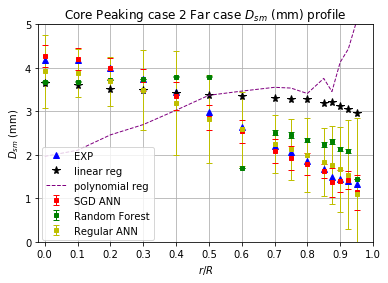

In [511]:
r_R = [0, .1, .2, .3, .4, .5, .6, .7, .75, .8, .85, .875, .9, .925, .95]

plt.plot(r_R, SGD_avg_Data['y_data'],'^',color='b',label='EXP')
plt.plot(r_R, linear_Data['model'],'*',color='k',ms=8,label='linear reg')
plt.plot(r_R, poly_linear_Data['model'],'--',color='purple',linewidth=1,label='polynomial reg')

plt.errorbar(r_R,SGD_avg_Data['model'],yerr=1.96*SGD_std_Data['model'],fmt='rs',ms=4,linewidth=1,capsize=3,label='SGD ANN')
plt.errorbar(r_R,avg_case17_Data.iloc[case_list[16][0]:case_list[16][1]],yerr=1.96*std_case17_Data.iloc[case_list[16][0]:case_list[16][1]],fmt='gs',ms=4,linewidth=1,capsize=3,label='Random Forest')
plt.errorbar(r_R,RA_avg_Data['model'],yerr=1.96*RA_std_Data['model'],fmt='ys',ms=4,linewidth=1,capsize=3,label='Regular ANN')

plt.yticks([i for i in range(6)])
plt.xticks([i*0.1 for i in range(11)])
plt.axis([-.02,1,0,5])
plt.legend(bbox_to_anchor=(0.11,0.21,0.25,0.25))
plt.grid(True)
plt.xlabel('$r/R$')
plt.ylabel('$D_{sm}$ (mm)')
plt.title('Core Peaking case 2 Far case $D_{sm}$ (mm) profile')
plt.savefig(r'D:\Desktop\SynologyDrive\하강우\bubble\wallcoresnu\case17_SGD_RF_method_profile.png',dpi=300)

In [502]:
for i in range(5):
    setattr(mod,'regular_ANN_Data_{}'.format(i+1), pd.read_csv(r'D:\Desktop\SynologyDrive\하강우\bubble\regular_ANN\iterfix_case17_Data_{}.csv'.format(i+1)))
    setattr(mod,'regular_ANN_Data_{}'.format(i+1), getattr(mod,'regular_ANN_Data_{}'.format(i+1))*std + mean)
    getattr(mod,'regular_ANN_Data_{}'.format(i+1))['model'] = getattr(mod,'regular_ANN_Data_{}'.format(i+1))['model']*R_csv['R']
    getattr(mod,'regular_ANN_Data_{}'.format(i+1))['y_data'] = getattr(mod,'regular_ANN_Data_{}'.format(i+1))['y_data']*R_csv['R']

RA_Data_model = pd.DataFrame()
RA_Data_model['model'] = [0 for i in range(case_list[16][1]-case_list[16][0])]

RA_Data_y_data = pd.DataFrame()
RA_Data_y_data['y_data'] = [0 for i in range(case_list[16][1]-case_list[16][0])]

for i in range(5):
    RA_Data_model['model{}'.format(i+1)] = getattr(mod,'regular_ANN_Data_{}'.format(i+1))['model'].iloc[case_list[16][0]:case_list[16][1]].reset_index(drop=True)
    RA_Data_y_data['y_data{}'.format(i+1)] = getattr(mod,'regular_ANN_Data_{}'.format(i+1))['y_data'].iloc[case_list[16][0]:case_list[16][1]].reset_index(drop=True)
    
del RA_Data_model['model']
del RA_Data_y_data['y_data']
    
RA_avg_Data = pd.DataFrame()    
RA_avg_Data['model'] =  RA_Data_model.mean(axis=1)
RA_avg_Data['y_data'] = RA_Data_y_data.mean(axis=1)

RA_std_Data = pd.DataFrame()
RA_std_Data['model'] = RA_Data_model.std(axis=1)
RA_std_Data['y_data'] = RA_Data_y_data.std(axis=1)

In [503]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
linear_model.fit(All_Data[All_Data.columns[:-3]].drop(range(case_list[16][0],case_list[16][1])).reset_index(drop=True),All_Data[All_Data.columns[-3:-2]].drop(range(case_list[16][0],case_list[16][1])).reset_index(drop=True))

linear_Data = pd.DataFrame()
linear_Data['model'] = linear_model.predict(All_Data[All_Data.columns[:-3]].iloc[case_list[16][0]:case_list[16][1]]).flatten()
linear_Data['y_data'] = All_Data[All_Data.columns[-3:-2]].iloc[case_list[16][0]:case_list[16][1]].reset_index(drop=True)

In [504]:
linear_Data = linear_Data*std + mean

linear_Data

,model,y_data
0,0.143403,0.134630
1,0.141710,0.135357
2,0.138235,0.135798
3,0.137189,0.136951
4,0.134898,0.136538
5,0.132528,0.137122
6,0.131573,0.136781
7,0.129990,0.134018
8,0.129508,0.132673
9,0.129669,0.131541


In [505]:
linear_Data['model'] = linear_Data['model']*R_csv['R'].iloc[case_list[16][0]:case_list[16][1]].reset_index(drop=True)
linear_Data['y_data'] = linear_Data['y_data']*R_csv['R'].iloc[case_list[16][0]:case_list[16][1]].reset_index(drop=True)

linear_Data

,model,y_data
0,3.642445,3.419594
1,3.599425,3.438065
2,3.511158,3.449266
3,3.484595,3.478562
4,3.426416,3.468067
5,3.366222,3.482891
6,3.341960,3.474232
7,3.301749,3.404063
8,3.289510,3.369897
9,3.293585,3.341142


[-3, 3, -3, 3]

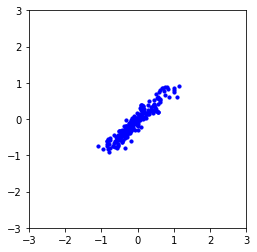

In [506]:
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(All_Data[All_Data.columns[:-3]].drop(range(case_list[16][0],case_list[16][1])).reset_index(drop=True))
X_poly2 =poly_reg.fit_transform(All_Data[All_Data.columns[:-3]].iloc[case_list[16][0]:case_list[16][1]])
poly_linear_reg = LinearRegression()
poly_linear_reg.fit(X_poly, All_Data[All_Data.columns[-3:-2]].drop(range(case_list[16][0],case_list[16][1])).reset_index(drop=True))

poly_linear_Data = pd.DataFrame()
poly_linear_Data['model'] = poly_linear_reg.predict(X_poly2).flatten()
poly_linear_Data['y_data'] = All_Data[All_Data.columns[-3:-2]].iloc[case_list[16][0]:case_list[16][1]].reset_index(drop=True)

poly_linear_Data = poly_linear_Data*std + mean
poly_linear_Data['model'] = poly_linear_Data['model']*R_csv['R'].iloc[case_list[16][0]:case_list[16][1]].reset_index(drop=True)
poly_linear_Data['y_data'] = poly_linear_Data['y_data']*R_csv['R'].iloc[case_list[16][0]:case_list[16][1]].reset_index(drop=True)

plt.gca().set_aspect('equal')
plt.scatter(poly_linear_Data['model'],poly_linear_Data['y_data'],s=10,color='r')
plt.scatter(poly_linear_reg.predict(X_poly).flatten(),All_Data[All_Data.columns[-3:-2]].drop(range(case_list[16][0],case_list[16][1])).reset_index(drop=True),s=10,color='b')
plt.axis([-3,3,-3,3])

,model,y_data
0,0.171143,0.062623
1,0.121948,0.066957
2,0.129761,0.043770
3,0.203247,0.042876
4,0.275757,0.044610
5,0.266968,0.041088
6,0.173950,0.044149
7,0.144897,0.024890
8,0.098999,0.005197
9,0.020996,-0.014361


In [239]:
case_list = [[0,5],[5,20],[20,35],[35,50],[50,65],[65,80],[80,95],[95,110],[110,125],[125,140],
             [140,155],[155,162],[162,169],[169,176],[176,183],[183,198],[198,213],[213,228],
             [228,243],[243,258],[258,273],[273,288],[288,302]]

import pandas as pd
import sys
mod = sys.modules[__name__]
from sklearn import ensemble
import numpy as np

Data = pd.read_csv(r'D:\Desktop\SynologyDrive\하강우\bubble\data\bubble.csv')
R_csv = pd.read_csv(r'D:\Desktop\SynologyDrive\하강우\bubble\data\R.csv')

num_Fold = 3
num_avg = 5

mean = Data.mean()[-1]
std = Data.std()[-1]

def stz(Data):
    return (Data - Data.mean())/Data.std()

def norm(Data, min_norm=-0.9, max_norm=0.9):
    return (Data - Data.min())/(Data.max() - Data.min())*(max_norm - min_norm) + min_norm

stz_Data = stz(Data)
norm_Data = norm(Data)

All_Data = pd.DataFrame()
All_Data[Data.columns[0:3]] = norm_Data[Data.columns[0:3]]
All_Data[Data.columns[3]] = stz_Data[Data.columns[3]]
All_Data[Data.columns[4]] = norm_Data[Data.columns[4]]
All_Data[Data.columns[5]] = stz_Data[Data.columns[5]]
All_Data['R'] = R_csv[['R']].iloc[:len(Data)]

for j in range(num_avg):
    for i in range(len(case_list)):

        train_X = All_Data[All_Data.columns[:-2]].drop(range(case_list[i][0],case_list[i][1])).reset_index(drop=True)
        train_Y = All_Data[All_Data.columns[-2:-1]].drop(range(case_list[i][0],case_list[i][1])).reset_index(drop=True)
        train_R = All_Data[All_Data.columns[-1:]].drop(range(case_list[i][0],case_list[i][1])).reset_index(drop=True)

        test_X = All_Data[All_Data.columns[:-2]].iloc[case_list[i][0]:case_list[i][1]].reset_index(drop=True)
        test_Y = All_Data[All_Data.columns[-2:-1]].iloc[case_list[i][0]:case_list[i][1]].reset_index(drop=True)
        test_R = All_Data[All_Data.columns[-1:]].iloc[case_list[i][0]:case_list[i][1]].reset_index(drop=True)

        RFmodel = ensemble.RandomForestRegressor(n_estimators=2000, min_samples_split=2, min_samples_leaf=1, bootstrap=False, oob_score=False, 
                                                                            max_depth=None, max_features='auto', random_state=None, n_jobs=2)
        RFmodel.fit(train_X, train_Y)

        setattr(mod,'case{}_Data{}'.format(i+1,j+1), pd.DataFrame())
        getattr(mod,'case{}_Data{}'.format(i+1,j+1))['model'] = RFmodel.predict(All_Data[All_Data.columns[:-2]]).flatten()
        getattr(mod,'case{}_Data{}'.format(i+1,j+1))['y_data'] = All_Data[All_Data.columns[-2:-1]]
        
        setattr(mod,'case{}_Data{}'.format(i+1,j+1), getattr(mod,'case{}_Data{}'.format(i+1,j+1))*std + mean)
        
        getattr(mod,'case{}_Data{}'.format(i+1,j+1))['model'] = getattr(mod,'case{}_Data{}'.format(i+1,j+1))['model']*R_csv['R']
        getattr(mod,'case{}_Data{}'.format(i+1,j+1))['y_data'] = getattr(mod,'case{}_Data{}'.format(i+1,j+1))['y_data']*R_csv['R']
        
        getattr(mod,'case{}_Data{}'.format(i+1,j+1)).to_csv(r'D:\Desktop\SynologyDrive\하강우\bubble\RF_case_modeling\RF_case{}_Data{}.csv'.format(i+1,j+1))
        

c:\users\user\anaconda\envs\tensorflow4\lib\site-packages\ipykernel_launcher.py:49: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
c:\users\user\anaconda\envs\tensorflow4\lib\site-packages\ipykernel_launcher.py:49: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
c:\users\user\anaconda\envs\tensorflow4\lib\site-packages\ipykernel_launcher.py:49: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
c:\users\user\anaconda\envs\tensorflow4\lib\site-packages\ipykernel_launcher.py:49: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
c:\users\user\anaconda\envs\tensorflow4\lib\

c:\users\user\anaconda\envs\tensorflow4\lib\site-packages\ipykernel_launcher.py:49: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
c:\users\user\anaconda\envs\tensorflow4\lib\site-packages\ipykernel_launcher.py:49: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
c:\users\user\anaconda\envs\tensorflow4\lib\site-packages\ipykernel_launcher.py:49: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
c:\users\user\anaconda\envs\tensorflow4\lib\site-packages\ipykernel_launcher.py:49: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
c:\users\user\anaconda\envs\tensorflow4\lib\

c:\users\user\anaconda\envs\tensorflow4\lib\site-packages\ipykernel_launcher.py:49: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
c:\users\user\anaconda\envs\tensorflow4\lib\site-packages\ipykernel_launcher.py:49: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
c:\users\user\anaconda\envs\tensorflow4\lib\site-packages\ipykernel_launcher.py:49: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
c:\users\user\anaconda\envs\tensorflow4\lib\site-packages\ipykernel_launcher.py:49: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
c:\users\user\anaconda\envs\tensorflow4\lib\

c:\users\user\anaconda\envs\tensorflow4\lib\site-packages\ipykernel_launcher.py:49: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
c:\users\user\anaconda\envs\tensorflow4\lib\site-packages\ipykernel_launcher.py:49: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
c:\users\user\anaconda\envs\tensorflow4\lib\site-packages\ipykernel_launcher.py:49: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
c:\users\user\anaconda\envs\tensorflow4\lib\site-packages\ipykernel_launcher.py:49: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
c:\users\user\anaconda\envs\tensorflow4\lib\

In [240]:
for i in range(len(case_list)):
    
    setattr(mod,'avg_case{}_Data_model'.format(i+1), pd.DataFrame())
    getattr(mod,'avg_case{}_Data_model'.format(i+1))['model'] = [0 for k in range(len(Data))]
    
    for j in range(num_avg):
        
        getattr(mod,'avg_case{}_Data_model'.format(i+1))['model{}'.format(j+1)] = getattr(mod,'case{}_Data{}'.format(i+1,j+1))['model']
        
    del getattr(mod,'avg_case{}_Data_model'.format(i+1))['model']
    
    setattr(mod,'avg_case{}_Data'.format(i+1), getattr(mod,'avg_case{}_Data_model'.format(i+1)).mean(axis=1))
    setattr(mod,'std_case{}_Data'.format(i+1), getattr(mod,'avg_case{}_Data_model'.format(i+1)).std(axis=1))

In [530]:
for j in range(5):
    for i in range(len(case_list)):
        setattr(mod,'case{}_RA_Data_{}'.format(i+1,j+1), pd.read_csv(r'D:\Desktop\SynologyDrive\하강우\bubble\regular_ANN\iterfix_case{}_Data_{}.csv'.format(i+1,j+1)))
        setattr(mod,'case{}_RA_Data_{}'.format(i+1,j+1),getattr(mod,'case{}_RA_Data_{}'.format(i+1,j+1))*std + mean)
        getattr(mod,'case{}_RA_Data_{}'.format(i+1,j+1))['model'] = getattr(mod,'case{}_RA_Data_{}'.format(i+1,j+1))['model']*R_csv['R']
        getattr(mod,'case{}_RA_Data_{}'.format(i+1,j+1))['y_data'] = getattr(mod,'case{}_RA_Data_{}'.format(i+1,j+1))['y_data']*R_csv['R']
                                                                            

    for i in range(len(case_list)):
        
    setattr(mod,'case{}_RA_Data_model'.format(n_case+1),pd.DataFrame())
    getattr(mod,'case{}_RA_Data_model'.format(n_case+1))['model'] = [0 for i in range(case_list[n_case][1]-case_list[n_case][0])]
    
    setattr(mod,'case{}_SGD_Data_y_data'.format(n_case+1),pd.DataFrame())
    getattr(mod,'case{}_SGD_Data_y_data'.format(n_case+1))['y_data'] = [0 for i in range(case_list[n_case][1]-case_list[n_case][0])]  

    for i in range(5):
        getattr(mod,'case{}_SGD_Data_model'.format(n_case+1))['model{}'.format(i+1)] = getattr(mod,'SGD_Data_{}'.format(i+1))['model'].iloc[case_list[n_case][0]:case_list[n_case][1]].reset_index(drop=True)
        getattr(mod,'case{}_SGD_Data_y_data'.format(n_case+1))['y_data{}'.format(i+1)] = getattr(mod,'SGD_Data_{}'.format(i+1))['y_data'].iloc[case_list[n_case][0]:case_list[n_case][1]].reset_index(drop=True)
        
    del getattr(mod,'case{}_SGD_Data_model'.format(n_case+1))['model']
    del getattr(mod,'case{}_SGD_Data_y_data'.format(n_case+1))['y_data']
    
    setattr(mod,'case{}_SGD_avg_Data'.format(n_case+1), pd.DataFrame())
    getattr(mod,'case{}_SGD_avg_Data'.format(n_case+1))['model'] = getattr(mod,'case{}_SGD_Data_model'.format(n_case+1)).mean(axis=1)
    getattr(mod,'case{}_SGD_avg_Data'.format(n_case+1))['y_data'] = getattr(mod,'case{}_SGD_Data_y_data'.format(n_case+1)).mean(axis=1)
    
    setattr(mod,'case{}_SGD_std_Data'.format(n_case+1), pd.DataFrame())
    getattr(mod,'case{}_SGD_std_Data'.format(n_case+1))['model'] = getattr(mod,'case{}_SGD_Data_model'.format(n_case+1)).std(axis=1)
    getattr(mod,'case{}_SGD_std_Data'.format(n_case+1))['y_data'] = getattr(mod,'case{}_SGD_Data_y_data'.format(n_case+1)).std(axis=1)

,model,y_data
0,3.036785,3.5498
1,3.036785,3.5498
2,2.991016,3.6405
3,2.954440,3.6949
4,2.770764,3.7311
5,4.322837,3.7930
6,4.234864,3.7807
7,4.088826,3.7198
8,4.089084,3.7439
9,3.950439,3.7154


In [513]:
for n_case in range(len(case_list)):
# Data_1.head()

    setattr(mod,'case{}_RA_Data_model'.format(n_case+1),pd.DataFrame())
    getattr(mod,'case{}_RA_Data_model'.format(n_case+1))['model'] = [0 for i in range(case_list[n_case][1]-case_list[n_case][0])]
    
    setattr(mod,'case{}_SGD_Data_y_data'.format(n_case+1),pd.DataFrame())
    getattr(mod,'case{}_SGD_Data_y_data'.format(n_case+1))['y_data'] = [0 for i in range(case_list[n_case][1]-case_list[n_case][0])]  

    for i in range(5):
        getattr(mod,'case{}_SGD_Data_model'.format(n_case+1))['model{}'.format(i+1)] = getattr(mod,'SGD_Data_{}'.format(i+1))['model'].iloc[case_list[n_case][0]:case_list[n_case][1]].reset_index(drop=True)
        getattr(mod,'case{}_SGD_Data_y_data'.format(n_case+1))['y_data{}'.format(i+1)] = getattr(mod,'SGD_Data_{}'.format(i+1))['y_data'].iloc[case_list[n_case][0]:case_list[n_case][1]].reset_index(drop=True)
        
    del getattr(mod,'case{}_SGD_Data_model'.format(n_case+1))['model']
    del getattr(mod,'case{}_SGD_Data_y_data'.format(n_case+1))['y_data']
    
    setattr(mod,'case{}_SGD_avg_Data'.format(n_case+1), pd.DataFrame())
    getattr(mod,'case{}_SGD_avg_Data'.format(n_case+1))['model'] = getattr(mod,'case{}_SGD_Data_model'.format(n_case+1)).mean(axis=1)
    getattr(mod,'case{}_SGD_avg_Data'.format(n_case+1))['y_data'] = getattr(mod,'case{}_SGD_Data_y_data'.format(n_case+1)).mean(axis=1)
    
    setattr(mod,'case{}_SGD_std_Data'.format(n_case+1), pd.DataFrame())
    getattr(mod,'case{}_SGD_std_Data'.format(n_case+1))['model'] = getattr(mod,'case{}_SGD_Data_model'.format(n_case+1)).std(axis=1)
    getattr(mod,'case{}_SGD_std_Data'.format(n_case+1))['y_data'] = getattr(mod,'case{}_SGD_Data_y_data'.format(n_case+1)).std(axis=1)

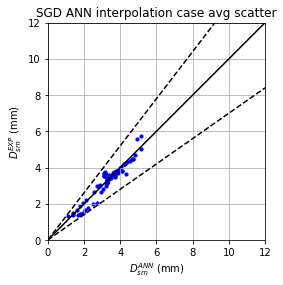

In [519]:
x = np.linspace(0,12)
y1 = x*1.3
y2 = x*0.7
plt.gca().set_aspect("equal")
for i in 1,2,3,6,16,17:
    plt.scatter(getattr(mod,'case{}_SGD_avg_Data'.format(i))['model'],getattr(mod,'case{}_SGD_avg_Data'.format(i))['y_data'],s=10,color='b')
plt.plot([0,12],[0,12],color='k')
plt.plot(x,y1,'--',color='k')
plt.plot(x,y2,'--',color='k')
plt.axis([0,12,0,12])
plt.grid(True)
plt.xlabel('$D_{sm}^{ANN}$ (mm)')
plt.ylabel('$D_{sm}^{EXP}$ (mm)')
plt.title('SGD ANN interpolation case avg scatter')
plt.savefig(r'D:\Desktop\SynologyDrive\하강우\bubble\wallcoresnu\SGD_ANN_inter_scatter.png',dpi=300)

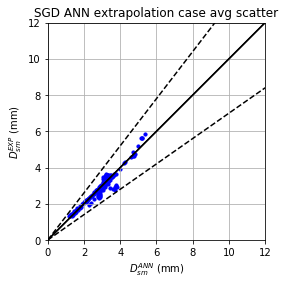

In [520]:
plt.gca().set_aspect("equal")
for i in 4,5,7,8,9,10,11,12,13,14,15,20,21,22,23:
    plt.scatter(getattr(mod,'case{}_SGD_avg_Data'.format(i))['model'],getattr(mod,'case{}_SGD_avg_Data'.format(i))['y_data'],s=10,color='b')
plt.plot([0,12],[0,12],color='k')
plt.axis([0,12,0,12])
plt.grid(True)
plt.plot([0,12],[0,12],color='k')
plt.plot(x,y1,'--',color='k')
plt.plot(x,y2,'--',color='k')
plt.axis([0,12,0,12])
plt.grid(True)
plt.xlabel('$D_{sm}^{ANN}$ (mm)')
plt.ylabel('$D_{sm}^{EXP}$ (mm)')
plt.title('SGD ANN extrapolation case avg scatter')
plt.savefig(r'D:\Desktop\SynologyDrive\하강우\bubble\wallcoresnu\SGD_ANN_extra_scatter.png',dpi=300)

In [523]:
def MSE(A,B):
    return ((A-B)**2).mean()
def ARE(A,T):
    return (abs((A-T)/T)*100).mean()

aa = []
bb = []
for i in 4,5,7,8,9,10,11,12,13,14,15,20,21,22,23:
    aa.append(MSE(getattr(mod,'case{}_SGD_avg_Data'.format(i))['model'],getattr(mod,'case{}_SGD_avg_Data'.format(i))['y_data']))
    bb.append(ARE(getattr(mod,'case{}_SGD_avg_Data'.format(i))['model'],getattr(mod,'case{}_SGD_avg_Data'.format(i))['y_data']))
    
print(np.sqrt(sum(aa)/len(aa)))
print(sum(bb)/len(bb))

0.23035999624392098
5.275346972581472


In [1]:
import pandas as pd
import sys
mod = sys.modules[__name__]
from sklearn import ensemble
import numpy as np

Data = pd.read_csv(r'D:\Desktop\SynologyDrive\하강우\bubble\data\bubble.csv')
R_csv = pd.read_csv(r'D:\Desktop\SynologyDrive\하강우\bubble\data\R.csv')

num_Fold = 3

mean = Data.mean()[-1]
std = Data.std()[-1]

def stz(Data):
    return (Data - Data.mean())/Data.std()

def norm(Data, min_norm=-0.9, max_norm=0.9):
    return (Data - Data.min())/(Data.max() - Data.min())*(max_norm - min_norm) + min_norm

stz_Data = stz(Data)
norm_Data = norm(Data)

All_Data = pd.DataFrame()
All_Data[Data.columns[0:3]] = norm_Data[Data.columns[0:3]]
All_Data[Data.columns[3]] = stz_Data[Data.columns[3]]
All_Data[Data.columns[4]] = norm_Data[Data.columns[4]]
All_Data[Data.columns[5]] = stz_Data[Data.columns[5]]
All_Data['R'] = R_csv[['R']].iloc[:len(Data)]